In [1]:
import tensorflow as tf
import tensorflow_data_validation as tfdv
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow_metadata.proto.v0 import schema_pb2
import numpy as np

# 1. Load the Dataset

In [2]:
preprocessed_dataset_df = pd.read_csv('preprocessed_dataset.csv', index_col = 0)

In [3]:
train_df, test_df = train_test_split(preprocessed_dataset_df, test_size=0.2, shuffle=True, stratify = preprocessed_dataset_df['label'])

In [4]:
train_df.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,label
16122,0.0,0.0,-0.305195,-0.095745,-0.590909,-0.276596,-0.766234,-0.430851,-0.694805,-0.553191,...,-0.696809,0.233766,-0.617021,0.175325,-0.851064,-0.025974,-0.808511,-0.155844,-0.696809,14
26966,0.0,0.0,-0.344086,-0.148936,-0.483871,-0.425532,-0.322581,-0.652482,-0.172043,-0.730496,...,-0.404255,0.215054,-0.517730,0.258065,-0.645390,0.182796,-0.439716,0.096774,-0.390071,23
13566,0.0,0.0,-0.354545,-0.147287,-0.381818,-0.503876,-0.090909,-0.689922,0.163636,-0.782946,...,-0.387597,0.618182,-0.488372,0.481818,-0.558140,0.263636,-0.379845,0.145455,-0.240310,12
1906,0.0,0.0,-0.516484,-0.075314,-0.824176,-0.280335,-0.703297,-0.481172,-0.428571,-0.589958,...,-0.970711,0.175824,-0.460251,0.076923,-0.619247,0.021978,-0.723849,-0.021978,-0.828452,2
23620,0.0,0.0,-0.157895,-0.095890,-0.126316,-0.269406,0.221053,-0.424658,0.484211,-0.525114,...,-0.328767,0.231579,-0.392694,0.400000,-0.470320,0.389474,-0.378995,0.326316,-0.319635,20


In [5]:
test_df.head()

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,label
5743,0.0,0.0,-0.405172,-0.185629,-0.568966,-0.485030,-0.327586,-0.670659,-0.077586,-0.574850,...,-0.640719,0.387931,-0.628743,0.431034,-0.868263,0.301724,-0.796407,0.258621,-0.694611,5
21620,0.0,0.0,-0.361345,-0.165563,-0.588235,-0.509934,-0.537815,-0.788079,-0.369748,-1.000000,...,-0.284768,0.378151,-0.695364,0.260504,-0.715232,0.168067,-0.496689,0.084034,-0.357616,19
236,0.0,0.0,-0.443662,-0.139394,-0.760563,-0.412121,-0.802817,-0.763636,-0.598592,-0.915152,...,-0.587879,0.197183,-0.672727,0.197183,-0.903030,0.147887,-0.660606,0.140845,-0.587879,1
18440,0.0,0.0,0.016667,0.196581,0.208333,0.452991,0.300000,0.743590,0.350000,1.000000,...,0.273504,0.650000,0.076923,0.616667,0.367521,0.466667,0.341880,0.433333,0.239316,16
5082,0.0,0.0,-0.375000,-0.111111,-0.642857,-0.375000,-0.517857,-0.537037,-0.273810,-0.444444,...,-0.564815,0.357143,-0.648148,0.309524,-0.898148,0.208333,-0.736111,0.208333,-0.620370,5


# 2. Data Validation using TensorFlow Data Validation library.

In [6]:
train_stats = tfdv.generate_statistics_from_dataframe(train_df)
test_stats = tfdv.generate_statistics_from_dataframe(test_df)
tfdv.visualize_statistics(train_stats)

In [7]:
#infer schema
schema = tfdv.infer_schema(statistics=train_stats)
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'x0',FLOAT,required,,-
'y0',FLOAT,required,,-
'x1',FLOAT,required,,-
'y1',FLOAT,required,,-
'x2',FLOAT,required,,-
'y2',FLOAT,required,,-
'x3',FLOAT,required,,-
'y3',FLOAT,required,,-
'x4',FLOAT,required,,-


In [8]:
#compare_statistics
tfdv.visualize_statistics(lhs_statistics = test_stats,
                         rhs_statistics = train_stats,
                         lhs_name = 'Evaluation Data',
                         rhs_name = 'Training Data')


In [9]:
#anomalies
anomalies = tfdv.validate_statistics(statistics = test_stats, schema = schema)
tfdv.display_anomalies(anomalies)

C:\Users\Dani\anaconda3\envs\DL\lib\site-packages\tensorflow_data_validation\utils\display_util.py:217: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


Let's drop the first 2 columns, x0 and y0, they dont contribute any predictive value.

In [10]:
train_df.drop(columns=['x0', 'y0'], inplace = True)
test_df.drop(columns=['x0', 'y0'], inplace = True)

C:\Users\Dani\anaconda3\envs\DL\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
train_df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,label
16122,-0.305195,-0.095745,-0.590909,-0.276596,-0.766234,-0.430851,-0.694805,-0.553191,-0.376623,-0.670213,...,-0.696809,0.233766,-0.617021,0.175325,-0.851064,-0.025974,-0.808511,-0.155844,-0.696809,14
26966,-0.344086,-0.148936,-0.483871,-0.425532,-0.322581,-0.652482,-0.172043,-0.730496,-0.591398,-0.631206,...,-0.404255,0.215054,-0.517730,0.258065,-0.645390,0.182796,-0.439716,0.096774,-0.390071,23
13566,-0.354545,-0.147287,-0.381818,-0.503876,-0.090909,-0.689922,0.163636,-0.782946,-0.200000,-0.813953,...,-0.387597,0.618182,-0.488372,0.481818,-0.558140,0.263636,-0.379845,0.145455,-0.240310,12
1906,-0.516484,-0.075314,-0.824176,-0.280335,-0.703297,-0.481172,-0.428571,-0.589958,-0.714286,-0.460251,...,-0.970711,0.175824,-0.460251,0.076923,-0.619247,0.021978,-0.723849,-0.021978,-0.828452,2
23620,-0.157895,-0.095890,-0.126316,-0.269406,0.221053,-0.424658,0.484211,-0.525114,-0.515789,-0.442922,...,-0.328767,0.231579,-0.392694,0.400000,-0.470320,0.389474,-0.378995,0.326316,-0.319635,20


In [12]:
test_df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,y16,x17,y17,x18,y18,x19,y19,x20,y20,label
5743,-0.405172,-0.185629,-0.568966,-0.485030,-0.327586,-0.670659,-0.077586,-0.574850,-0.336207,-0.706587,...,-0.640719,0.387931,-0.628743,0.431034,-0.868263,0.301724,-0.796407,0.258621,-0.694611,5
21620,-0.361345,-0.165563,-0.588235,-0.509934,-0.537815,-0.788079,-0.369748,-1.000000,-0.487395,-0.841060,...,-0.284768,0.378151,-0.695364,0.260504,-0.715232,0.168067,-0.496689,0.084034,-0.357616,19
236,-0.443662,-0.139394,-0.760563,-0.412121,-0.802817,-0.763636,-0.598592,-0.915152,-0.542254,-0.703030,...,-0.587879,0.197183,-0.672727,0.197183,-0.903030,0.147887,-0.660606,0.140845,-0.587879,1
18440,0.016667,0.196581,0.208333,0.452991,0.300000,0.743590,0.350000,1.000000,0.641667,0.059829,...,0.273504,0.650000,0.076923,0.616667,0.367521,0.466667,0.341880,0.433333,0.239316,16
5082,-0.375000,-0.111111,-0.642857,-0.375000,-0.517857,-0.537037,-0.273810,-0.444444,-0.416667,-0.731481,...,-0.564815,0.357143,-0.648148,0.309524,-0.898148,0.208333,-0.736111,0.208333,-0.620370,5


In [13]:
X_df = train_df.iloc[:,:-1].copy()

In [14]:
X_df.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
16122,-0.305195,-0.095745,-0.590909,-0.276596,-0.766234,-0.430851,-0.694805,-0.553191,-0.376623,-0.670213,...,-0.272727,-0.696809,0.233766,-0.617021,0.175325,-0.851064,-0.025974,-0.808511,-0.155844,-0.696809
26966,-0.344086,-0.148936,-0.483871,-0.425532,-0.322581,-0.652482,-0.172043,-0.730496,-0.591398,-0.631206,...,-0.064516,-0.404255,0.215054,-0.517730,0.258065,-0.645390,0.182796,-0.439716,0.096774,-0.390071
13566,-0.354545,-0.147287,-0.381818,-0.503876,-0.090909,-0.689922,0.163636,-0.782946,-0.200000,-0.813953,...,0.018182,-0.387597,0.618182,-0.488372,0.481818,-0.558140,0.263636,-0.379845,0.145455,-0.240310
1906,-0.516484,-0.075314,-0.824176,-0.280335,-0.703297,-0.481172,-0.428571,-0.589958,-0.714286,-0.460251,...,-0.307692,-0.970711,0.175824,-0.460251,0.076923,-0.619247,0.021978,-0.723849,-0.021978,-0.828452
23620,-0.157895,-0.095890,-0.126316,-0.269406,0.221053,-0.424658,0.484211,-0.525114,-0.515789,-0.442922,...,0.168421,-0.328767,0.231579,-0.392694,0.400000,-0.470320,0.389474,-0.378995,0.326316,-0.319635


# 3. Feature Selection.

There are 3 different methods to perform feature selection:  

    1. Filter methods: Correlation (features-target and between features), Univariate feature Selection (ANOVA)...
    2. Wrapper methods: Forward, Backward, and Recursive feature elimination (Feature importance)...
    3. Embedded methods: L1/L2 Regularization, Feature Importance... 
Next, I am analyzing the correlation between features and the correlation between the features and the target. A high correlation between features may imply a redundance in our feature space, if that is the case we would be able to reduce the dimensionality of it. A high correlation between a feature and the target it that there is information in the feature that predicts the target, predictive value.  

## 3.1. Correlation Feaures and Target: Feature Importance.

First we are going to study the correlation that exists between the features and the target, we will remove from the dataset those features that are not correlated to the target. We want to improve the quality of the dataset, thus, we want to improve the predictive value of it by only keeping features that contribute information correlated to the target. Using a Random Forest model the importance of each feature can be calculated.

In [15]:
import time
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

n_iterations = 10
mean_feature_importance_array = np.zeros((1,40))
for i in range(n_iterations):
    train_df, test_df = train_test_split(preprocessed_dataset_df.iloc[:,2:], test_size=0.2, shuffle=True, stratify = preprocessed_dataset_df['label'])
    model1 = RFC()
    model1.fit(train_df.iloc[:,:-1], train_df.iloc[:,-1])
    feature_importances_list = model1.feature_importances_
    mean_feature_importance_array = mean_feature_importance_array + np.array(feature_importances_list).reshape(1,40)/n_iterations

print(mean_feature_importance_array)    
feature_names = train_df.columns
feature_importances_dict = {}
for i in range(len(feature_names)-1):
    feature_importances_dict[feature_names[i]] = mean_feature_importance_array[0][i]

[[0.01762539 0.00836199 0.01278997 0.01383146 0.02083741 0.03195028
  0.04839397 0.06124768 0.00976434 0.01751797 0.01334513 0.01916387
  0.02161237 0.03780013 0.02864497 0.04353165 0.00721243 0.0197388
  0.00996044 0.02567679 0.02237136 0.03770024 0.03004659 0.04727381
  0.01042406 0.01938539 0.01171697 0.03935005 0.00932473 0.04102396
  0.01024939 0.04943647 0.02248114 0.0153686  0.01099201 0.03402613
  0.00915561 0.04156033 0.01417114 0.05493499]]


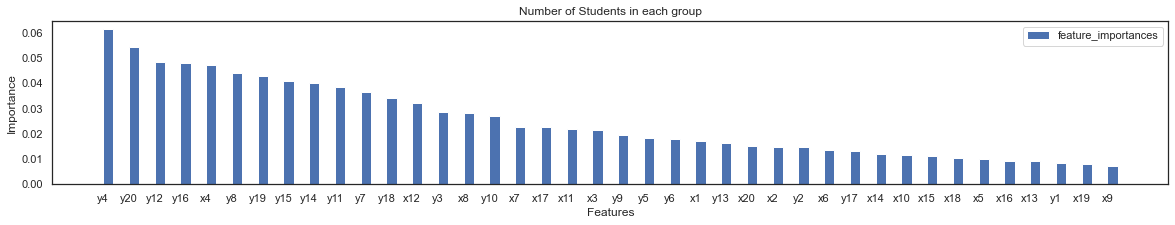

In [52]:
import matplotlib.pyplot as plt

#sort the dictionary by importance
feature_importances_dic = dict(list(zip(feature_names[:-1],feature_importances_list)))
feature_importances_dic = {k:v for k, v in sorted(feature_importances_dic.items(), key = lambda item: item[1], reverse=True)}

X_axis = np.arange(len(feature_importances_dic))
plt.figure(figsize=(20, 3))  
plt.bar(X_axis + 0.2, feature_importances_dic.values(), 0.4, label = 'feature_importances')
plt.xticks(X_axis, feature_importances_dic.keys())
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

I will define n_features_dropt_by_importance as the number of features that I will remove from the feature space based on the results of the importance analysis.

In [17]:
import time
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

def performance_analysis_for_feature_dimensionalisty_reduction(preprocessed_dataset_df, feature_importances_dic, n_iterations=10):
    
    X = preprocessed_dataset_df.iloc[:, 2:-1]
    y = preprocessed_dataset_df.iloc[:, -1]
    
    feature_names = X.columns
    
    feat_list = []
    accuracy_history = []
    #to reduce the variance of the results we are going to repeat 15 times each iteration over the threshold values
    for i in range(n_iterations):
        
        i_time = time.time()        
        accuracy_iteration =[]
        n_features = len(feature_importances_dic)
        
        #split into train and test => RANDOM 
        X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, shuffle=True, stratify = y.copy())
        j = 1
        #iterate over the threshold values:
        
        for i in range(n_features-1):
            
            t_time = time.time()
            
            if i!=0:
                features_to_delete = list(feature_importances_dic.keys())[n_features-i:]
                n_features_deleted = len(features_to_delete)

                X_train_i = X_train.copy()
                X_test_i = X_test.copy()

                #delete the features  whose correlation is over the treshold based on the criterion previously defined
                X_train_i.drop(features_to_delete, axis = 1, inplace = True)
                X_test_i.drop(features_to_delete, axis = 1, inplace = True)
            else:
                X_train_i = X_train.copy()
                X_test_i = X_test.copy()
                n_features_deleted = 0
            model = RFC() #create model
            
            model.fit(X_train_i, y_train) #train model
            
            y_pred = model.predict(X_test_i) #test model
            score = (accuracy_score(y_test, y_pred))*100 #Compute accuracy of the model trained with a reduced feature space
            accuracy_iteration.append(score) #save the score

            tit = round(time.time()-t_time,2)
            print(f'       -  Feature Space n: {n_features-n_features_deleted} / Score: {round(score, 4)}% / time: {tit}  -         ')
            j +=1
            n_feat_del_old = n_features_deleted

        accuracy_history.append(accuracy_iteration)
        tit1 = round(time.time() -i_time,2)
        tit2 = f'{int((tit1-(tit1%60))/60)} min {round(tit1%60, 2)} s'
        print(f'\n***********[END OF Iter: {int(i)} // time: {tit2}]***********\n')
        
    
    accuracy = np.mean(np.array(accuracy_history), axis = 0)
    n_feature_array = [n_features-i for i in range(len(accuracy))]
    plt.figure(figsize=(14,10))  
    plt.plot(n_feature_array, accuracy, label = 'Score of the RFC model', linewidth = 0.5)
    plt.scatter(n_feature_array, accuracy, s = 2)
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()

    plt.figure(figsize=(14,10))  
    plt.plot(n_feature_array, accuracy, label = 'Score of the RFC model', linewidth = 0.5)
    plt.scatter(n_feature_array, accuracy, s = 2)
    plt.xlabel('Number of Features')
    plt.xlim([5,40])
    plt.ylim([90,100])
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()  


       -  Feature Space n: 40 / Score: 98.8715% / time: 11.47  -         
       -  Feature Space n: 39 / Score: 98.9236% / time: 11.62  -         
       -  Feature Space n: 38 / Score: 98.9931% / time: 11.13  -         
       -  Feature Space n: 37 / Score: 98.8368% / time: 11.76  -         
       -  Feature Space n: 36 / Score: 98.9062% / time: 12.38  -         
       -  Feature Space n: 35 / Score: 98.8021% / time: 10.03  -         
       -  Feature Space n: 34 / Score: 98.7326% / time: 9.9  -         
       -  Feature Space n: 33 / Score: 98.8194% / time: 9.51  -         
       -  Feature Space n: 32 / Score: 98.8021% / time: 9.61  -         
       -  Feature Space n: 31 / Score: 98.8715% / time: 9.25  -         
       -  Feature Space n: 30 / Score: 98.8368% / time: 9.59  -         
       -  Feature Space n: 29 / Score: 98.8368% / time: 9.51  -         
       -  Feature Space n: 28 / Score: 98.8021% / time: 9.53  -         
       -  Feature Space n: 27 / Score: 98.8368

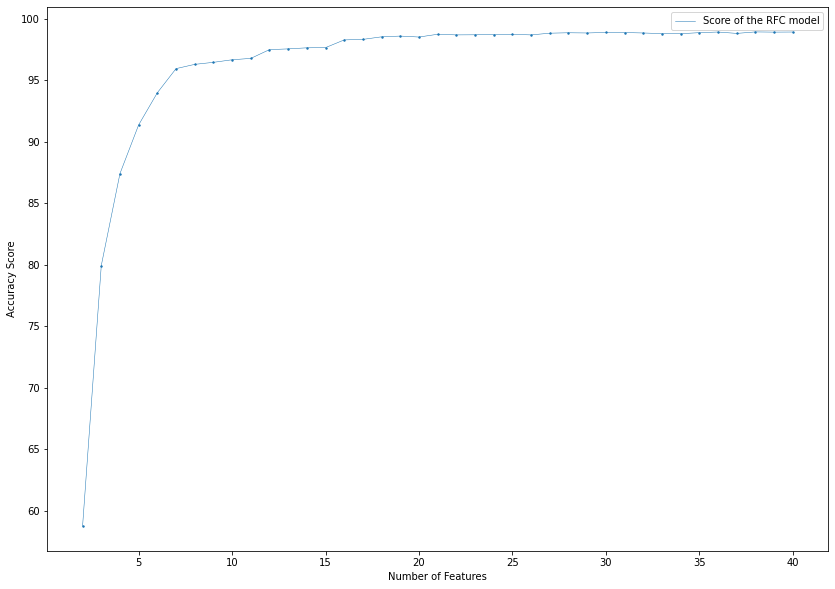

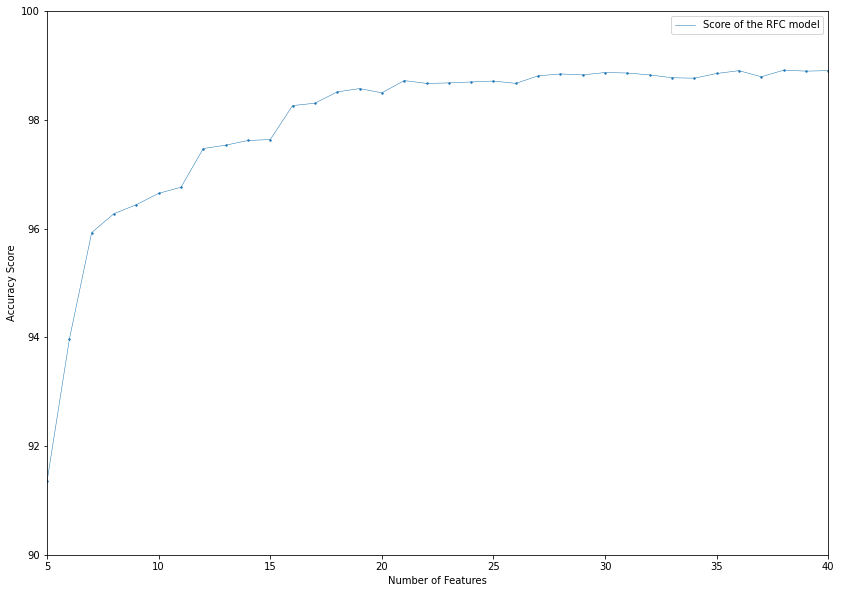

In [20]:
performance_analysis_for_feature_dimensionalisty_reduction(preprocessed_dataset_df,feature_importances_dic, n_iterations=2)

As we see we in the plot above, we can get an accuracy above 95% using the 10 features with the highest feature importance, to get an accuracy > 98.5% we need to use at least 30 features. I have decided to remove the 10 least important features from the dataset. This will not affect significantly the score.

In [18]:
print(f'Features to be removed: {list(feature_importances_dic.keys())[0:-10]}')
reduced_dataset_df = preprocessed_dataset_df.loc[:, list(feature_importances_dic.keys())[0:-10]+['label']].copy()
reduced_dataset_df.head()

Features to be removed: ['y4', 'y20', 'y12', 'y16', 'x4', 'y8', 'y19', 'y15', 'y14', 'y11', 'y7', 'y18', 'x12', 'y3', 'x8', 'y10', 'x7', 'x17', 'x11', 'x3', 'y9', 'y5', 'y6', 'x1', 'y13', 'x20', 'x2', 'y2', 'x6', 'y17']


,y4,y20,y12,y16,x4,y8,y19,y15,y14,y11,...,y5,y6,x1,y13,x20,x2,y2,x6,y17,label
0,-0.735714,-0.592857,-0.542857,-0.571429,-0.801527,-0.492857,-0.700000,-0.685714,-1.000000,-0.642857,...,-0.528571,-0.828571,-0.496183,-0.721429,0.068702,-0.862595,-0.242857,-0.832061,-0.742857,1
1,-0.863014,-0.910959,-0.794521,-0.835616,-1.000000,-0.719178,-0.979452,-0.931507,-0.986301,-0.876712,...,-0.616438,-0.808219,-0.476190,-0.726027,-0.150794,-0.785714,-0.390411,-0.761905,-0.753425,1
2,-0.770701,-1.000000,-0.929936,-0.980892,-1.000000,-0.853503,-0.936306,-0.929936,-0.802548,-0.853503,...,-0.477707,-0.643312,-0.414634,-0.560510,-0.252033,-0.666667,-0.414013,-0.821138,-0.605096,1
3,-0.862595,-0.587786,-0.526718,-0.526718,-0.909774,-0.534351,-0.702290,-0.625954,-1.000000,-0.610687,...,-0.610687,-0.946565,-0.451128,-0.702290,0.007519,-0.796992,-0.274809,-0.766917,-0.717557,1
4,-0.860294,-0.602941,-0.529412,-0.544118,-0.954198,-0.536765,-0.727941,-0.654412,-1.000000,-0.610294,...,-0.580882,-0.911765,-0.465649,-0.683824,0.007634,-0.793893,-0.279412,-0.740458,-0.705882,1


## 3.2. Correlation between features.

We have filtered the feature space, removing the 10 least important features. Now let's check that there are not strongly correlated features, we will drop the redundant features.  
I will first calculate and plot a correlation matrix. To do this I will calculate a mean correlation matrix by splitting the dataset 50 times randomly. This may not be necessary but I prefer to do it like this to minimize the variance produced by the train-test split.

In [19]:
# Mean Correlation Matrix Absolute corr values: The triangular (low) and the complete one (full)
def mean_corr_matrix_features(dataset_df, n_iter):
    
    X_df = dataset_df.iloc[:, :-1].copy() #Delete the label (It is categorical in this case, Pearson coeff should not be used)
    n_initial_features = len(X_df.columns)
    mean_corr_matrix = np.zeros((n_initial_features, n_initial_features)) #Initialize mean correlation matrix
    
    for iter in range(n_iter): #Do n_iter splits
        X_train_df, _ = train_test_split(X_df, test_size=0.2, shuffle=True, stratify = dataset_df['label'])
        corr_matrix = np.array(X_train_df.corr())
        mean_corr_matrix = mean_corr_matrix + corr_matrix
        
    mean_corr_matrix = mean_corr_matrix/n_iter
    corr_full = abs(np.array(X_train_df.corr())) #absolute corr values
    corr_tril = abs(np.tril(corr_full) - np.identity(corr_full.shape[0])) 
    
    return corr_tril, corr_full 

Here I obtain the  mean correlation matrix, using 50 iterations.

In [20]:
n_iter = 50
corr_tril, corr_full = mean_corr_matrix_features(reduced_dataset_df, n_iter)

Let's visualize the correlation matrix using seaborn and this function

In [21]:
#function to visualize the correlation, to plot the correlation matrix...
import seaborn as sns
import matplotlib.pyplot as plt

def corr_plot(corr_full): #Plots the corr matrix using the FULL corr matrix
    sns.set_theme(style="white")

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr_full, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(dpi = 150)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr_full, mask=mask, cmap=cmap,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=False, yticklabels=False)

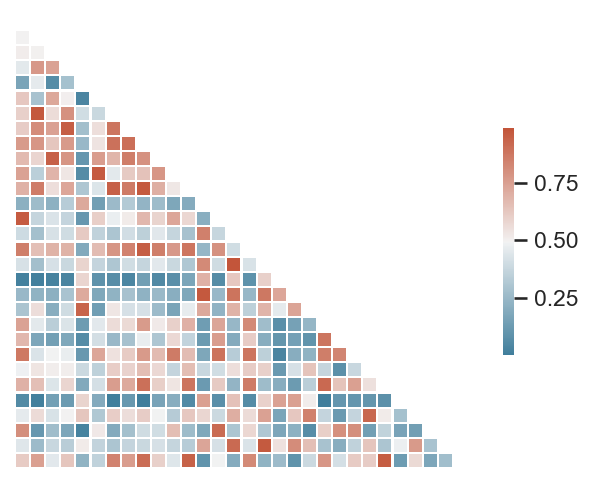

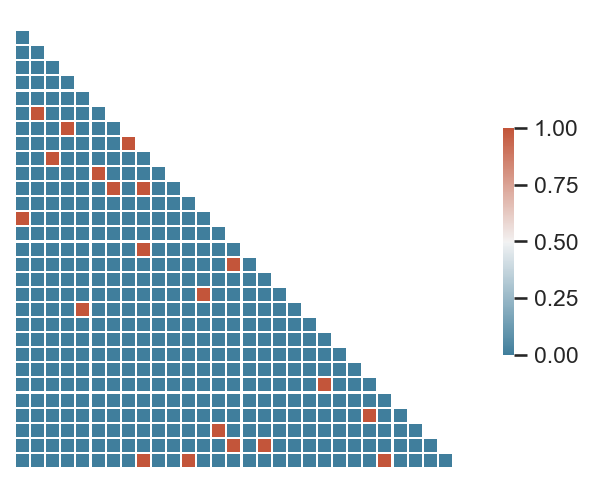

In [22]:
corr_plot(corr_full) # Plot of the (mean) correlation matrix of the features
corr_threshold = 0.9
corr_matrix_binary = corr_full >= corr_threshold 
corr_plot(corr_matrix_binary)

In [ ]:
def high_corr(threshold, corr_tril): # Returns a list of pairs of features which corr is above the threshold
    
    t = threshold
    corr = corr_tril.copy()
    highly_corr_feat = np.where(corr>t)
    
    high_corr_list = list(zip(highly_corr_feat[0], highly_corr_feat[1]))
        
    return high_corr_list

In [54]:
high_corr_features_list = high_corr(corr_threshold, corr_tril)
feature_name_list = reduced_dataset_df.columns
high_corr_features_list = [(feature_name_list[pair[0]], feature_name_list[pair[1]]) for pair in high_corr_features_list]
print(f'This Features have a Strong Correlation, higher than {corr_threshold}:\n', high_corr_features_list)

This Features have a Strong Correlation, higher than 0.9:
 [('y19', 'y20'), ('y15', 'y16'), ('y14', 'y15'), ('y11', 'y12'), ('y7', 'y8'), ('y18', 'y19'), ('y18', 'y14'), ('y3', 'y4'), ('y10', 'y14'), ('x7', 'x8'), ('x11', 'x12'), ('x3', 'x4'), ('y13', 'y9'), ('x2', 'x1'), ('y2', 'y3'), ('x6', 'x8'), ('x6', 'x7'), ('y17', 'y14'), ('y17', 'y18'), ('y17', 'y13')]


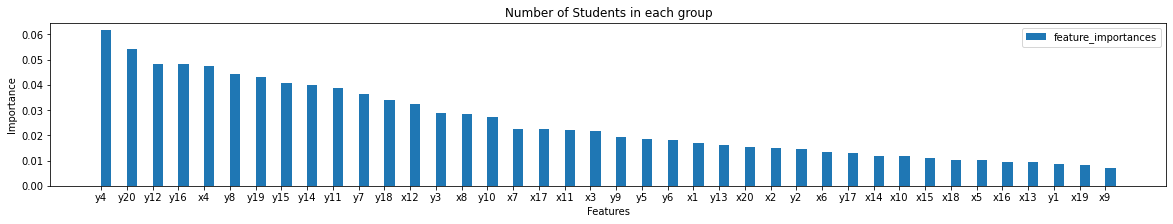

Now I know what features have a strong correlation, and I also know the feature importance. I have to reduce the redundancy inside the feature space, but trying to minimize the prediction value. That is why I will prioritize the removal of a feature with low feature importance that are strongly correlated to high importance features.

In [56]:
features_to_remove_list = []
for pair in high_corr_features_list:
    f1 = pair[0]
    f2 = pair[1]
    f1_importance = feature_importances_dic[f1]
    f2_importance = feature_importances_dic[f2]
    
    if f1_importance < f2_importance:
        if f1 not in features_to_remove_list:
            features_to_remove_list.insert(0, f1)
    else: 
        if f2 not in features_to_remove_list:
            features_to_remove_list.insert(0, f2)

print(f'List of Feature that have low feature importance and are higly correlated with other feature(s):\n {features_to_remove_list}')

List of Feature that have low feature importance and are higly correlated with other feature(s):
 ['y17', 'x6', 'y2', 'x2', 'y13', 'x3', 'x11', 'x7', 'y10', 'y3', 'y18', 'y7', 'y11', 'y14', 'y15', 'y19']


In [97]:
def performance_analysis_for_feature_dimensionalisty_reduction_correlation(reduced_dataset_df, high_correlated_features_list, n_iterations=10):
    
    X = reduced_dataset_df.iloc[:, :-1]
    y = reduced_dataset_df.iloc[:, -1]
    
    feature_names = X.columns
    n_initial_features = len(feature_names)
    feat_list = []
    accuracy_history = []
    
    for i in range(n_iterations):
        
        i_time = time.time()        
        accuracy_iteration =[]
        n_features_higly_corrrelated = len(high_correlated_features_list)
        
        #split into train and test => RANDOM 
        X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.2, shuffle=True, stratify = y.copy())
        j = 1
        
        
        for i in range(n_features_higly_corrrelated):
            
            t_time = time.time()
            
            if i!=0:
                features_to_delete = high_correlated_features_list[:i]
                n_features_deleted = len(features_to_delete)

                X_train_i = X_train.copy()
                X_test_i = X_test.copy()

                #delete the features  whose correlation is over the treshold based on the criterion previously defined
                X_train_i.drop(features_to_delete, axis = 1, inplace = True)
                X_test_i.drop(features_to_delete, axis = 1, inplace = True)
            else:
                X_train_i = X_train.copy()
                X_test_i = X_test.copy()
                features_to_delete = [high_correlated_features_list[0]]
                n_features_deleted = 0
                #X_train_i.drop(features_to_delete, axis = 1, inplace = True)
                #X_test_i.drop(features_to_delete, axis = 1, inplace = True)
                
            model = RFC() #create model
            
            model.fit(X_train_i, y_train) #train model
            
            y_pred = model.predict(X_test_i) #test model
            score = (accuracy_score(y_test, y_pred))*100 #Compute accuracy of the model trained with a reduced feature space
            accuracy_iteration.append(score) #save the score

            tit = round(time.time()-t_time,2)
            print(f'       -  Feature Space n: {n_initial_features-n_features_deleted} / Score: {round(score, 4)}% / time: {tit}  -         ')
            j +=1
            

        accuracy_history.append(accuracy_iteration)
        tit1 = round(time.time() -i_time,2)
        tit2 = f'{int((tit1-(tit1%60))/60)} min {round(tit1%60, 2)} s'
        print(f'\n***********[END OF Iter: {int(i)} // time: {tit2}]***********\n')
        
    
    accuracy = np.mean(np.array(accuracy_history), axis = 0)
    n_feature_array = [n_initial_features-i for i in range(len(accuracy))]
    plt.figure(figsize=(14,10))  
    plt.plot(n_feature_array, accuracy, label = 'Score of the RFC model', linewidth = 0.5)
    plt.scatter(n_feature_array, accuracy, s = 2)
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()

    plt.figure(figsize=(14,10))  
    plt.plot(n_feature_array, accuracy, label = 'Score of the RFC model', linewidth = 0.5)
    plt.scatter(n_feature_array, accuracy, s = 2)
    plt.xlabel('Number of Features')
    plt.xlim([13,32])
    plt.ylim([97,100])
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()  


       -  Feature Space n: 30 / Score: 98.75% / time: 10.15  -         
       -  Feature Space n: 29 / Score: 98.8021% / time: 10.91  -         
       -  Feature Space n: 28 / Score: 98.75% / time: 11.7  -         
       -  Feature Space n: 27 / Score: 98.6979% / time: 10.39  -         
       -  Feature Space n: 26 / Score: 98.5764% / time: 9.84  -         
       -  Feature Space n: 25 / Score: 98.7326% / time: 9.95  -         
       -  Feature Space n: 24 / Score: 98.8194% / time: 8.14  -         
       -  Feature Space n: 23 / Score: 98.5243% / time: 7.94  -         
       -  Feature Space n: 22 / Score: 98.559% / time: 8.15  -         
       -  Feature Space n: 21 / Score: 98.2986% / time: 8.21  -         
       -  Feature Space n: 20 / Score: 98.559% / time: 7.98  -         
       -  Feature Space n: 19 / Score: 98.4549% / time: 8.04  -         
       -  Feature Space n: 18 / Score: 98.5243% / time: 7.89  -         
       -  Feature Space n: 17 / Score: 98.5069% / time

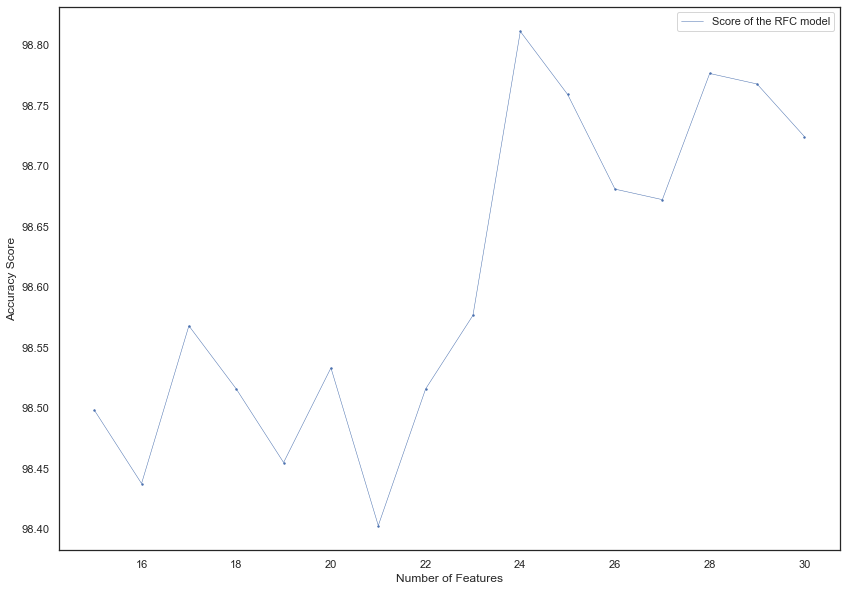

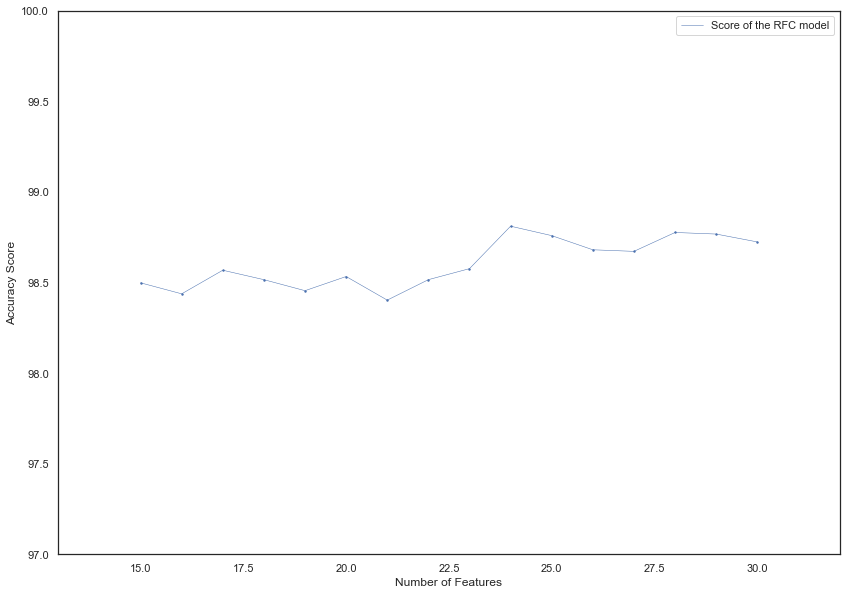

In [98]:
performance_analysis_for_feature_dimensionalisty_reduction_correlation(reduced_dataset_df, features_to_remove_list, 2)

I am going to delete 6 features.

In [99]:
n_features_to_delete = 6
print(f'I have decided to remove these Features from the dataset: {features_to_remove_list[0:n_features_to_delete +1]}')
reduced_dataset_df = reduced_dataset_df.drop(features_to_remove_list[0:n_features_to_delete +1], axis=1).copy()
reduced_dataset_df.head()

['y17', 'x6', 'y2', 'x2', 'y13', 'x3', 'x11']


,y4,y20,y12,y16,x4,y8,y19,y15,y14,y11,...,x8,y10,x7,x17,y9,y5,y6,x1,x20,label
0,-0.735714,-0.592857,-0.542857,-0.571429,-0.801527,-0.492857,-0.700000,-0.685714,-1.000000,-0.642857,...,-0.633588,-0.935714,-0.694656,0.061069,-0.657143,-0.528571,-0.828571,-0.496183,0.068702,1
1,-0.863014,-0.910959,-0.794521,-0.835616,-1.000000,-0.719178,-0.979452,-0.931507,-0.986301,-0.876712,...,-0.714286,-0.924658,-0.769841,-0.015873,-0.684932,-0.616438,-0.808219,-0.476190,-0.150794,1
2,-0.770701,-1.000000,-0.929936,-0.980892,-1.000000,-0.853503,-0.936306,-0.929936,-0.802548,-0.853503,...,-0.943089,-0.719745,-0.918699,-0.073171,-0.515924,-0.477707,-0.643312,-0.414634,-0.252033,1
3,-0.862595,-0.587786,-0.526718,-0.526718,-0.909774,-0.534351,-0.702290,-0.625954,-1.000000,-0.610687,...,-0.624060,-0.992366,-0.676692,0.060150,-0.671756,-0.610687,-0.946565,-0.451128,0.007519,1
4,-0.860294,-0.602941,-0.529412,-0.544118,-0.954198,-0.536765,-0.727941,-0.654412,-1.000000,-0.610294,...,-0.618321,-0.970588,-0.648855,0.045802,-0.647059,-0.580882,-0.911765,-0.465649,0.007634,1
